## Dataset [Shoulder Implant X-Ray Manufacturer Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Shoulder+Implant+X-Ray+Manufacturer+Classification)

##Data preprocessing

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip

--2024-02-12 21:59:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [     <=>            ]   6.01M  4.89MB/s    in 1.2s    

2024-02-12 21:59:22 (4.89 MB/s) - ‘data.zip’ saved [6306316]



In [2]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/Tornier.53.jpg     
  inflating: data/Cofield.61.jpg     
  inflating: data/Tornier.60.jpg     
  inflating: data/Depuy.15.jpg       
  inflating: data/Depuy.147.jpg      
  inflating: data/Zimmer.123.jpg     
  inflating: data/Zimmer.134.jpg     
  inflating: data/Cofield.40.jpg     
  inflating: data/Cofield.8.jpg      
  inflating: data/Depuy.42.jpg       
  inflating: data/Depuy.295.jpg      
  inflating: data/Tornier.45.jpg     
  inflating: data/Depuy.123.jpg      
  inflating: data/Zimmer.34.jpg      
  inflating: data/Depuy.166.jpg      
  inflating: data/Depuy.249.jpg      
  inflating: data/Tornier.59.jpg     
  inflating: data/Cofield.52.jpg     
  inflating: data/Zimmer.86.jpg      
  inflating: data/Zimmer.8.jpg       
  inflating: data/Depuy.280.jpg      
  inflating: data/Depuy.264.jpg      
  inflating: data/Depuy.36.jpg       
  inflating: data/Depuy.180.jpg      
  inflating: data/Depuy.140.jpg      
  i

In [3]:
import os
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.applications.resnet_v2 import ResNet50V2
from keras.layers import Dropout, Dense, Input
from keras.models import Model, load_model
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
!ls /content/data | wc -l

597


In [4]:
dir = '/content/data'

In [7]:
Cofield_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Cofield' in file_name]
Depuy_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Depuy' in file_name]
Tornier_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Tornier' in file_name]
Zimmer_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Zimmer' in file_name]

In [8]:
print(Cofield_filepaths)
print(Depuy_filepaths)
print(Tornier_filepaths)
print(Zimmer_filepaths)

['/content/data/Cofield.83.jpg', '/content/data/Cofield.57.jpg', '/content/data/Cofield.58.jpg', '/content/data/Cofield.75.jpg', '/content/data/Cofield.16.jpg', '/content/data/Cofield.80.jpg', '/content/data/Cofield.59.jpg', '/content/data/Cofield.8.jpg', '/content/data/Cofield.71.jpg', '/content/data/Cofield.42.jpg', '/content/data/Cofield.2.jpg', '/content/data/Cofield.24.jpg', '/content/data/Cofield.26.jpg', '/content/data/Cofield.52.jpg', '/content/data/Cofield.40.jpg', '/content/data/Cofield.27.jpg', '/content/data/Cofield.5.jpg', '/content/data/Cofield.79.jpg', '/content/data/Cofield.66.jpg', '/content/data/Cofield.13.jpg', '/content/data/Cofield.63.jpg', '/content/data/Cofield.88.jpg', '/content/data/Cofield.55.jpg', '/content/data/Cofield.44.jpg', '/content/data/Cofield.14.jpg', '/content/data/Cofield.72.jpg', '/content/data/Cofield.47.jpg', '/content/data/Cofield.19.jpg', '/content/data/Cofield.50.jpg', '/content/data/Cofield.45.jpg', '/content/data/Cofield.31.jpg', '/content/

In [9]:
print(len(Cofield_filepaths))
print(len(Depuy_filepaths))
print(len(Tornier_filepaths))
print(len(Zimmer_filepaths))

83
294
71
149


In [10]:
Cofield_filepaths_train = Cofield_filepaths[:int(len(Cofield_filepaths)*0.8)]
Cofield_filepaths_test = Cofield_filepaths[int(len(Cofield_filepaths)*0.8):]
Depuy_filepaths_train = Depuy_filepaths[:int(len(Depuy_filepaths)*0.8)]
Depuy_filepaths_test = Depuy_filepaths[int(len(Depuy_filepaths)*0.8):]
Tornier_filepaths_train = Tornier_filepaths[:int(len(Tornier_filepaths)*0.8)]
Tornier_filepaths_test = Tornier_filepaths[int(len(Tornier_filepaths)*0.8):]
Zimmer_filepaths_train = Zimmer_filepaths[:int(len(Zimmer_filepaths)*0.8)]
Zimmer_filepaths_test = Zimmer_filepaths[int(len(Zimmer_filepaths)*0.8):]

In [11]:
print(len(Cofield_filepaths_train))
print(len((Cofield_filepaths_test)))
print(Cofield_filepaths_train)
print(Cofield_filepaths_test)

66
17
['/content/data/Cofield.83.jpg', '/content/data/Cofield.57.jpg', '/content/data/Cofield.58.jpg', '/content/data/Cofield.75.jpg', '/content/data/Cofield.16.jpg', '/content/data/Cofield.80.jpg', '/content/data/Cofield.59.jpg', '/content/data/Cofield.8.jpg', '/content/data/Cofield.71.jpg', '/content/data/Cofield.42.jpg', '/content/data/Cofield.2.jpg', '/content/data/Cofield.24.jpg', '/content/data/Cofield.26.jpg', '/content/data/Cofield.52.jpg', '/content/data/Cofield.40.jpg', '/content/data/Cofield.27.jpg', '/content/data/Cofield.5.jpg', '/content/data/Cofield.79.jpg', '/content/data/Cofield.66.jpg', '/content/data/Cofield.13.jpg', '/content/data/Cofield.63.jpg', '/content/data/Cofield.88.jpg', '/content/data/Cofield.55.jpg', '/content/data/Cofield.44.jpg', '/content/data/Cofield.14.jpg', '/content/data/Cofield.72.jpg', '/content/data/Cofield.47.jpg', '/content/data/Cofield.19.jpg', '/content/data/Cofield.50.jpg', '/content/data/Cofield.45.jpg', '/content/data/Cofield.31.jpg', '/co

In [12]:
print(len(Depuy_filepaths_train))
print(len((Depuy_filepaths_test)))
print(Depuy_filepaths_train)
print(Depuy_filepaths_test)

235
59
['/content/data/Depuy.139.jpg', '/content/data/Depuy.292.jpg', '/content/data/Depuy.133.jpg', '/content/data/Depuy.30.jpg', '/content/data/Depuy.283.jpg', '/content/data/Depuy.265.jpg', '/content/data/Depuy.113.jpg', '/content/data/Depuy.104.jpg', '/content/data/Depuy.74.jpg', '/content/data/Depuy.64.jpg', '/content/data/Depuy.162.jpg', '/content/data/Depuy.94.jpg', '/content/data/Depuy.35.jpg', '/content/data/Depuy.154.jpg', '/content/data/Depuy.179.jpg', '/content/data/Depuy.285.jpg', '/content/data/Depuy.231.jpg', '/content/data/Depuy.144.jpg', '/content/data/Depuy.134.jpg', '/content/data/Depuy.258.jpg', '/content/data/Depuy.198.jpg', '/content/data/Depuy.93.jpg', '/content/data/Depuy.238.jpg', '/content/data/Depuy.172.jpg', '/content/data/Depuy.121.jpg', '/content/data/Depuy.25.jpg', '/content/data/Depuy.83.jpg', '/content/data/Depuy.233.jpg', '/content/data/Depuy.212.jpg', '/content/data/Depuy.47.jpg', '/content/data/Depuy.289.jpg', '/content/data/Depuy.132.jpg', '/content

In [13]:
print(len(Tornier_filepaths_train))
print(len((Tornier_filepaths_test)))
print(Tornier_filepaths_train)
print(Tornier_filepaths_test)

56
15
['/content/data/Tornier.71.jpg', '/content/data/Tornier.11.jpg', '/content/data/Tornier.23.jpg', '/content/data/Tornier.49.jpg', '/content/data/Tornier.51.jpg', '/content/data/Tornier.64.jpg', '/content/data/Tornier.54.jpg', '/content/data/Tornier.65.jpg', '/content/data/Tornier.62.jpg', '/content/data/Tornier.36.jpg', '/content/data/Tornier.1.jpg', '/content/data/Tornier.67.jpg', '/content/data/Tornier.38.jpg', '/content/data/Tornier.58.jpg', '/content/data/Tornier.45.jpg', '/content/data/Tornier.48.jpg', '/content/data/Tornier.43.jpg', '/content/data/Tornier.66.jpg', '/content/data/Tornier.29.jpg', '/content/data/Tornier.21.jpg', '/content/data/Tornier.40.jpg', '/content/data/Tornier.57.jpg', '/content/data/Tornier.3.jpg', '/content/data/Tornier.35.jpg', '/content/data/Tornier.4.jpg', '/content/data/Tornier.68.jpg', '/content/data/Tornier.30.jpg', '/content/data/Tornier.59.jpg', '/content/data/Tornier.37.jpg', '/content/data/Tornier.8.jpg', '/content/data/Tornier.6.jpg', '/cont

In [ ]:
print(len(Zimmer_filepaths_train))
print(len((Zimmer_filepaths_test)))
print(Zimmer_filepaths_train)
print(Zimmer_filepaths_test)

119
30
['/content/data/Zimmer.88.jpg', '/content/data/Zimmer.56.jpg', '/content/data/Zimmer.37.jpg', '/content/data/Zimmer.151.jpg', '/content/data/Zimmer.117.jpg', '/content/data/Zimmer.13.jpg', '/content/data/Zimmer.149.jpg', '/content/data/Zimmer.55.jpg', '/content/data/Zimmer.95.jpg', '/content/data/Zimmer.137.jpg', '/content/data/Zimmer.42.jpg', '/content/data/Zimmer.57.jpg', '/content/data/Zimmer.104.jpg', '/content/data/Zimmer.141.jpg', '/content/data/Zimmer.83.jpg', '/content/data/Zimmer.18.jpg', '/content/data/Zimmer.134.jpg', '/content/data/Zimmer.5.jpg', '/content/data/Zimmer.54.jpg', '/content/data/Zimmer.58.jpg', '/content/data/Zimmer.116.jpg', '/content/data/Zimmer.67.jpg', '/content/data/Zimmer.14.jpg', '/content/data/Zimmer.51.jpg', '/content/data/Zimmer.12.jpg', '/content/data/Zimmer.129.jpg', '/content/data/Zimmer.52.jpg', '/content/data/Zimmer.38.jpg', '/content/data/Zimmer.132.jpg', '/content/data/Zimmer.70.jpg', '/content/data/Zimmer.11.jpg', '/content/data/Zimmer.

In [14]:
Train_data_filepaths = Cofield_filepaths_train + Depuy_filepaths_train + Tornier_filepaths_train + Zimmer_filepaths_train
Test_data_filepaths = Cofield_filepaths_test + Depuy_filepaths_test + Tornier_filepaths_test + Zimmer_filepaths_test
print(len(Train_data_filepaths))
print(len(Test_data_filepaths))

476
121


In [15]:
Train_data_label = []
for filepath in Train_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[3]
    Train_data_label.append(label)

In [16]:
print(len(Train_data_label))
print(Train_data_label)

476
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy',

In [17]:
Test_data_label = []
for filepath in Test_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[3]
    Test_data_label.append(label)

In [18]:
print(len(Test_data_label))
print(Test_data_label)

121
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Z

In [19]:
Train_df = pd.DataFrame({'Train_data_filepaths':Train_data_filepaths,'Train_data_label':Train_data_label})
Train_df

,Train_data_filepaths,Train_data_label
0,/content/data/Cofield.83.jpg,Cofield
1,/content/data/Cofield.57.jpg,Cofield
2,/content/data/Cofield.58.jpg,Cofield
3,/content/data/Cofield.75.jpg,Cofield
4,/content/data/Cofield.16.jpg,Cofield
...,...,...
471,/content/data/Zimmer.65.jpg,Zimmer
472,/content/data/Zimmer.96.jpg,Zimmer
473,/content/data/Zimmer.125.jpg,Zimmer
474,/content/data/Zimmer.44.jpg,Zimmer


In [20]:
Test_df = pd.DataFrame({'Test_data_filepaths':Test_data_filepaths,'Test_data_label':Test_data_label})
Test_df

,Test_data_filepaths,Test_data_label
0,/content/data/Cofield.85.jpg,Cofield
1,/content/data/Cofield.15.jpg,Cofield
2,/content/data/Cofield.22.jpg,Cofield
3,/content/data/Cofield.9.jpg,Cofield
4,/content/data/Cofield.17.jpg,Cofield
...,...,...
116,/content/data/Zimmer.24.jpg,Zimmer
117,/content/data/Zimmer.87.jpg,Zimmer
118,/content/data/Zimmer.137.jpg,Zimmer
119,/content/data/Zimmer.100.jpg,Zimmer


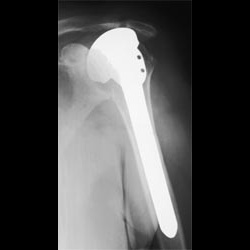

In [21]:
PIL.Image.open(str(Train_data_filepaths[0]))

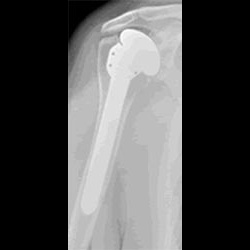

In [22]:
PIL.Image.open(str(Train_data_filepaths[1]))

In [23]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Train_df,
    directory='/content/data',
    x_col='Train_data_filepaths',
    y_col='Train_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123,subset='training')

Found 476 validated image filenames belonging to 4 classes.


In [24]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Test_df,
    directory='/content/data',
    x_col='Test_data_filepaths',
    y_col='Test_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123)

Found 121 validated image filenames belonging to 4 classes.


In [25]:
class_dict = train_generator.class_indices
class_dict
key_list = list(class_dict.keys())
value_list = list(class_dict.values())

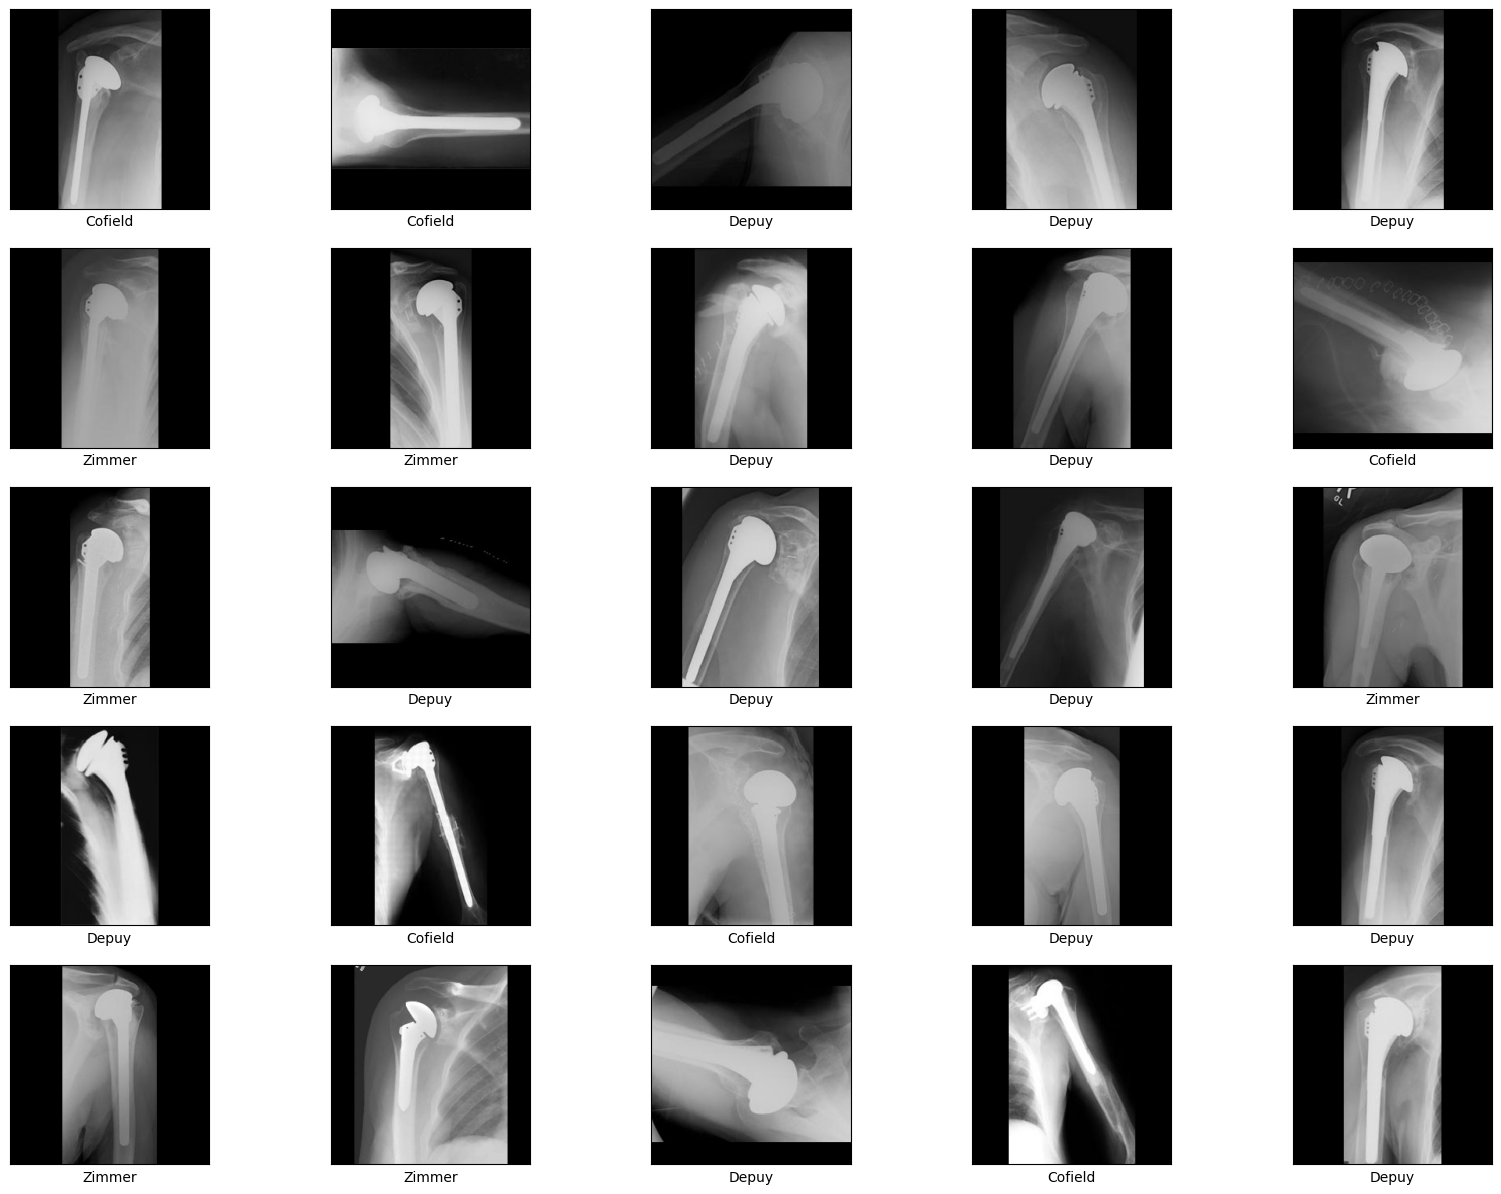

In [26]:
plt.figure(figsize=(20, 15))
images, encoded_labels  = next(train_generator)
labels = np.argmax(encoded_labels,axis =1)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(key_list[labels[i]])
plt.show()

In [27]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


##Xray Manufacturer Classification using Convolutional Neural Networks(CNN)

In [ ]:
num_classes = len(class_dict)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
epochs=20
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20
15/15 [==============================] - 11s 111ms/step - loss: 1.3209 - accuracy: 0.4958
Epoch 2/20
15/15 [==============================] - 1s 81ms/step - loss: 1.2492 - accuracy: 0.4937
Epoch 3/20
15/15 [==============================] - 1s 79ms/step - loss: 1.2403 - accuracy: 0.4937
Epoch 4/20
15/15 [==============================] - 1s 78ms/step - loss: 1.2265 - accuracy: 0.4937
Epoch 5/20
15/15 [==============================] - 1s 79ms/step - loss: 1.2293 - accuracy: 0.4937
Epoch 6/20
15/15 [==============================] - 1s 79ms/step - loss: 1.2276 - accuracy: 0.4937
Epoch 7/20
15/15 [==============================] - 1s 79ms/step - loss: 1.2320 - accuracy: 0.4937
Epoch 8/20
15/15 [==============================] - 1s 78ms/step - loss: 1.2426 - accuracy: 0.4937
Epoch 9/20
15/15 [==============================] - 1s 80ms/step - loss: 1.2269 - accuracy: 0.4937
Epoch 10/20
15/15 [==============================] - 1s 76ms/step - loss: 1.2592 - accuracy: 0.4937
Epoch 1

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 153ms/step - loss: 1.3864 - accuracy: 0.2479


[1.3863646984100342, 0.24793387949466705]

In [ ]:
model.predict(test_generator)

In [ ]:
epochs=20
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20
15/15 [==============================] - 2s 104ms/step - loss: 1.3067 - accuracy: 0.4664
Epoch 2/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2430 - accuracy: 0.4937
Epoch 3/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2332 - accuracy: 0.4937
Epoch 4/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2377 - accuracy: 0.4937
Epoch 5/20
15/15 [==============================] - 2s 97ms/step - loss: 1.2410 - accuracy: 0.4937
Epoch 6/20
15/15 [==============================] - 2s 101ms/step - loss: 1.2278 - accuracy: 0.4937
Epoch 7/20
15/15 [==============================] - 2s 100ms/step - loss: 1.2338 - accuracy: 0.4937
Epoch 8/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2388 - accuracy: 0.4937
Epoch 9/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2309 - accuracy: 0.4937
Epoch 10/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2344 - accuracy: 0.4937
Epoch 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 0s 81ms/step - loss: 1.2330 - accuracy: 0.4876


[1.2330079078674316, 0.4876033067703247]

In [ ]:
pred = model.predict(test_generator, verbose = 1)

4/4 [==============================] - 0s 81ms/step


In [ ]:
pred = [np.argmax(i) for i in pred]
pred

In [ ]:
actual = test_generator.classes
actual

In [ ]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.49      1.00      0.66        59
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        30

    accuracy                           0.49       121
   macro avg       0.12      0.25      0.16       121
weighted avg       0.24      0.49      0.32       121



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
